# Titanic Deep Learning

solve Titanic Project with Keras and Deep Learning Classification Deep Learning
Example: Pima Indians Diabetes

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import normalize, scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.decomposition import PCA

#### Veri okuma ve birleştirme

In [3]:
train=pd.read_csv("ttrain.csv")

In [4]:
train.shape

(891, 12)

In [5]:
test=pd.read_csv("ttest.csv")

In [6]:
test.shape

(418, 11)

In [7]:
df=pd.concat([train,test],ignore_index=True)

In [8]:
#x=train.drop("Survived",axis=1)
#y=train["Survived"]

In [9]:
df.shape

(1309, 12)

In [10]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Feature Engineering

In [11]:
tahmin=pd.DataFrame()

In [12]:
tahmin["PassengerId"]=test["PassengerId"]

In [13]:
df=df.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)

In [14]:
df.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

In [15]:
df["Age"].fillna(df["Age"].median(),inplace=True)
df["Fare"].fillna(df["Fare"].mean(),inplace=True)
df["Embarked"].fillna("S",inplace=True)

In [16]:
df=pd.get_dummies(df,drop_first=True)

In [17]:
df.shape

(1309, 9)

In [18]:
#x= pd.get_dummies(x, drop_first=True)
#test=pd.get_dummies(test, drop_first=True)

In [19]:
train=df[:891]

In [20]:
train.shape

(891, 9)

In [21]:
test=pd.DataFrame()

In [22]:
test=df[891:]

In [23]:
test=test.drop("Survived",axis=1)

In [24]:
x = train.drop("Survived",axis=1)
y = train["Survived"]

In [25]:
x.shape

(891, 8)

In [26]:
x=scale(x)
test=scale(test)

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.10 ,random_state=42)

### Modelling

In [28]:
model=Sequential()
model.add(Dense(240,activation="relu"))  # Modele layer ekliyor # Dense bütün nöronlar bütün nöronlara bağlansın demek
model.add(Dense(196,activation="relu")) # 120 nöron var 
model.add(Dense(144,activation="relu"))
model.add(Dense(112,activation="relu"))
model.add(Dense(96,activation="relu"))
model.add(Dense(72,activation="relu"))
model.add(Dense(60,activation="relu"))
model.add(Dense(48,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(18,activation="relu"))
model.add(Dense(6,activation="relu"))
model.add(Dense(1,activation="sigmoid")) 
model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])
                                   

In [29]:
model.fit(x_train,y_train,epochs=300,batch_size=18, validation_split=.20, verbose=1) 

Epoch 1/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6566 - loss: 0.6320 - val_accuracy: 0.7640 - val_loss: 0.5365
Epoch 2/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7871 - loss: 0.5312 - val_accuracy: 0.7826 - val_loss: 0.4580
Epoch 3/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8196 - loss: 0.4364 - val_accuracy: 0.8199 - val_loss: 0.4101
Epoch 4/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8260 - loss: 0.4378 - val_accuracy: 0.7950 - val_loss: 0.4107
Epoch 5/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8283 - loss: 0.3906 - val_accuracy: 0.8323 - val_loss: 0.4023
Epoch 6/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8066 - loss: 0.4247 - val_accuracy: 0.8137 - val_loss: 0.4263
Epoch 7/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7955 - loss: 0.4403 - val_accuracy: 0.8447 - val_loss: 0.3975
Epoch 8/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8494 - loss: 0.3797 - val_accuracy: 0.8075 - v

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 240)                 │           2,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 196)                 │          47,236 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 144)                 │          28,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 112)                 │          16,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 96)                  │          10,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 72)                  │           6,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 60)                  │           4,380 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 48)                  │           2,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 18)                  │             594 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 6)                   │             114 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 364,283 (1.39 MB)

 Trainable params: 121,427 (474.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 242,856 (948.66 KB)

In [31]:
history=model.fit(x_train,y_train,epochs=300,batch_size=18, validation_split=.20, verbose=1) 

Epoch 1/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9489 - loss: 0.1457 - val_accuracy: 0.8012 - val_loss: 1.2766
Epoch 2/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9238 - loss: 0.1693 - val_accuracy: 0.8199 - val_loss: 1.4605
Epoch 3/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9238 - loss: 0.1637 - val_accuracy: 0.7950 - val_loss: 1.3358
Epoch 4/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9260 - loss: 0.1826 - val_accuracy: 0.8075 - val_loss: 1.4432
Epoch 5/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9241 - loss: 0.1773 - val_accuracy: 0.8261 - val_loss: 1.2825
Epoch 6/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9138 - loss: 0.1889 - val_accuracy: 0.8199 - val_loss: 1.5294
Epoch 7/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9251 - loss: 0.1619 - val_accuracy: 0.8137 - val_loss: 1.5211
Epoch 8/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9319 - loss: 0.1602 - val_accuracy: 0.8199 - v

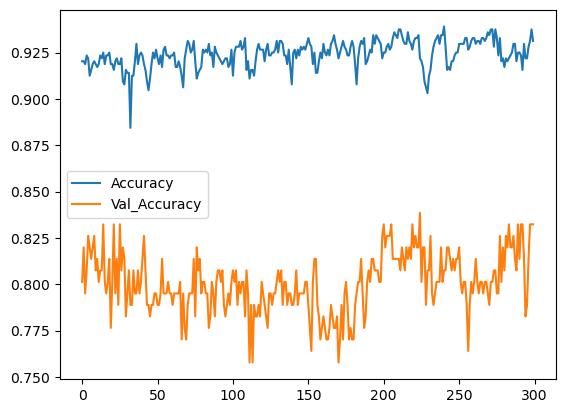

In [32]:
plt.plot(history.history["accuracy"],label="Accuracy")         #Eğitim kümesinin dogrulugu
plt.plot(history.history["val_accuracy"],label="Val_Accuracy") # Dogrulama kümesinin dogrulugu
plt.legend()

In [33]:
thmn=model.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [34]:
thmn=(thmn > 0.5).astype(int)

### Results

In [35]:
accuracy_score(thmn,y_test)

0.8666666666666667

In [36]:
confusion_matrix(thmn,y_test)

array([[46,  4],
       [ 8, 32]], dtype=int64)

In [37]:
print(classification_report(thmn,y_test))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        50
           1       0.89      0.80      0.84        40

    accuracy                           0.87        90
   macro avg       0.87      0.86      0.86        90
weighted avg       0.87      0.87      0.87        90



In [38]:
tahmin["Survived"]=model.predict(test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [39]:
tahmin

,PassengerId,Survived
0,892,4.899906e-06
1,893,3.960346e-23
2,894,1.764760e-26
3,895,1.424757e-01
4,896,4.974306e-03
...,...,...
413,1305,1.763966e-01
414,1306,1.000000e+00
415,1307,7.017314e-02
416,1308,1.763966e-01


In [40]:
tahmin["Survived"]=(tahmin["Survived"] > 0.5).astype(int)

In [41]:
hayattakalan=tahmin[tahmin["Survived"]==1]

In [42]:
hayattakalan

,PassengerId,Survived
6,898,1
8,900,1
12,904,1
14,906,1
15,907,1
...,...,...
409,1301,1
410,1302,1
411,1303,1
414,1306,1


In [43]:
tahmin.to_csv("tahmin.csv", index=False)